In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [20]:
train = pd.read_csv('C:/Users/nyc15/Desktop/data/train.csv')
test = pd.read_csv('C:/Users/nyc15/Desktop/data/test_x.csv')

In [21]:
y = train.voted.copy()
train = train.drop(columns = 'voted')
data = pd.concat([train,test])

In [22]:
data.shape,y.shape

((56915, 77), (45532,))

In [30]:
data.drop(index= data[data.familysize >=100].index, inplace = True) # 가족 사이즈 3개 열 (2147483647 , 999 , 100) 제거 

In [33]:
data[data.familysize >=100]

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13


## 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답

In [34]:
data.education.value_counts()

2    21068
3    19024
4     9817
1     6352
0      650
Name: education, dtype: int64

In [35]:
data[data.education == 0] # train 컬럼에만 결측치 

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
113,113,3.0,749,3.0,539,4.0,487,2.0,937,3.0,...,1,1,0,1,1,0,1,0,1,1
262,262,1.0,402,4.0,1117,4.0,676,1.0,1056,1.0,...,1,1,0,1,1,0,1,0,1,1
439,439,3.0,395,4.0,1700,1.0,664,2.0,562,3.0,...,1,0,0,1,1,0,1,0,1,1
537,537,1.0,456,5.0,1515,4.0,1312,2.0,3694,5.0,...,1,1,0,1,1,0,1,1,1,1
715,715,1.0,275,5.0,1307,4.0,861,1.0,615,5.0,...,1,1,1,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11059,11059,2.0,856,3.0,3621,4.0,932,2.0,1619,4.0,...,1,1,0,1,1,1,1,1,1,1
11073,11073,1.0,468,1.0,2281,1.0,1474,1.0,1622,4.0,...,1,1,0,1,1,0,1,0,1,1
11255,11255,3.0,659,4.0,2750,4.0,459,2.0,630,4.0,...,1,1,1,1,1,0,1,1,1,1
11277,11277,2.0,658,5.0,914,5.0,2102,1.0,476,5.0,...,1,1,0,1,1,0,1,0,1,1


In [40]:
data.columns[41:]

Index(['age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01', 'wf_02',
       'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
       'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

(array([  650.,     0.,  6352.,     0.,     0., 21068.,     0., 19024.,
            0.,  9817.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

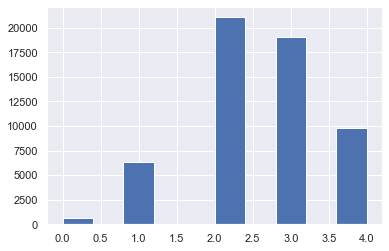

In [73]:
plt.hist(data.education)

In [97]:
ads = data.iloc[:,-13:].apply(lambda x: 56915- x.value_counts()[1])
df =pd.DataFrame()
for num,i in enumerate(ads):
    df[ads.index.values[num]] = data.iloc[:,-13:].iloc[:,num]*i
data['wrsum'] = df.sum(axis = 1)

In [113]:
data[data.education != 0][['wrsum','education']].corr()

,wrsum,education
wrsum,1.000000,0.252721
education,0.252721,1.000000


In [117]:
nodata = data[data.education == 0]

In [118]:
indata = data[data.education != 0]

In [306]:
indata['wrsums']=indata.iloc[:,61:77].sum(axis = 1)

In [119]:
nodata.shape,indata.shape

((650, 78), (56261, 78))

In [175]:
indata.iloc[:,41:].groupby(['age_group','married','education']).size().loc['+70s']

married  education
0        4             1
1        1             2
         2             6
         3             4
         4             6
2        1             5
         2            38
         3            57
         4            77
3        1             4
         2            42
         3            28
         4            29
dtype: int64

In [169]:
nodata.groupby('age_group').size()

age_group
+70s      7
10s     144
20s     165
30s     138
40s      91
50s      71
60s      34
dtype: int64

In [181]:
indata = pd.concat([indata,pd.get_dummies(indata['age_group'])],axis=1)

In [182]:
indata

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_12,wr_13,wrsum,+70s,10s,20s,30s,40s,50s,60s
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,1,1,24924,0,0,0,1,0,0,0
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,32341,0,0,1,0,0,0,0
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,94260,0,0,0,1,0,0,0
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,1,1,15507,0,0,1,0,0,0,0
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,121453,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,...,1,1,48827,0,0,1,0,0,0,0
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,...,1,1,211917,0,1,0,0,0,0,0
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,...,1,1,93858,0,0,0,1,0,0,0
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,...,1,0,73132,0,0,0,0,1,0,0


In [186]:
indata.iloc[:,41:].corr()['education']

education     1.000000
engnat        0.140881
familysize   -0.009554
hand         -0.035647
married       0.260888
tp01         -0.043494
tp02          0.106205
tp03         -0.110720
tp04          0.072525
tp05         -0.067401
tp06          0.053688
tp07         -0.104885
tp08          0.151071
tp09         -0.102817
tp10          0.030206
urban        -0.012622
wf_01        -0.031696
wf_02        -0.014616
wf_03         0.014124
wr_01         0.115594
wr_02         0.015937
wr_03         0.229388
wr_04         0.049212
wr_05         0.076917
wr_06         0.198968
wr_07        -0.006444
wr_08         0.006034
wr_09         0.155082
wr_10         0.026861
wr_11         0.139968
wr_12         0.050607
wr_13         0.033522
wrsum         0.252721
+70s          0.035735
10s          -0.593503
20s           0.214452
30s           0.213664
40s           0.167680
50s           0.115171
60s           0.080498
Name: education, dtype: float64

In [193]:
indata['agenum'] = indata['age_group'].map({'30s':30, '20s':20, '40s':40, '50s':50, '10s':10, '60s':60, '+70s':70})

In [191]:
indata['age_group'].unique()

array(['30s', '20s', '40s', '50s', '10s', '60s', '+70s'], dtype=object)

In [202]:
indata['sex'] = indata['gender'].map({'Male':1,'Female':0})

In [203]:
indata

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wrsum,+70s,10s,20s,30s,40s,50s,60s,agenum,sex
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,24924,0,0,0,1,0,0,0,30,0
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,32341,0,0,1,0,0,0,0,20,0
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,94260,0,0,0,1,0,0,0,30,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,15507,0,0,1,0,0,0,0,20,0
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,121453,0,0,1,0,0,0,0,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,...,48827,0,0,1,0,0,0,0,20,0
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,...,211917,0,1,0,0,0,0,0,10,0
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,...,93858,0,0,0,1,0,0,0,30,1
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,...,73132,0,0,0,0,1,0,0,40,0


In [254]:
indata['eng'] = indata['engnat'].map({2:0,1:1,0:0})

In [307]:
indata.iloc[:,41:].corr()['education']

education     1.000000
engnat        0.140881
familysize   -0.009554
hand         -0.035647
married       0.260888
tp01         -0.043494
tp02          0.106205
tp03         -0.110720
tp04          0.072525
tp05         -0.067401
tp06          0.053688
tp07         -0.104885
tp08          0.151071
tp09         -0.102817
tp10          0.030206
urban        -0.012622
wf_01        -0.031696
wf_02        -0.014616
wf_03         0.014124
wr_01         0.115594
wr_02         0.015937
wr_03         0.229388
wr_04         0.049212
wr_05         0.076917
wr_06         0.198968
wr_07        -0.006444
wr_08         0.006034
wr_09         0.155082
wr_10         0.026861
wr_11         0.139968
wr_12         0.050607
wr_13         0.033522
wrsum         0.252721
+70s          0.035735
10s          -0.593503
20s           0.214452
30s           0.213664
40s           0.167680
50s           0.115171
60s           0.080498
agenum        0.444194
sex          -0.033858
eng          -0.140602
wrsums     

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

In [278]:
x = indata[['10s','wrsum','agenum']]#,'wrsum'
x

,10s,wrsum,agenum
0,0,24924,30
1,0,32341,20
2,0,94260,30
3,0,15507,20
4,0,121453,20
...,...,...,...
11378,0,48827,20
11379,1,211917,10
11380,0,93858,30
11381,0,73132,40


In [279]:
y = indata['education']
y

0        2
1        4
2        3
3        4
4        3
        ..
11378    3
11379    2
11380    4
11381    2
11382    4
Name: education, Length: 56261, dtype: int64

In [309]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=11)

In [310]:
rf = RandomForestClassifier(n_estimators=300) #,min_samples_leaf=4,max_depth=7,criterion='entropy'
# rf.fit(xtrain,ytrain)
# ypred = rf.predict(xtest)

In [313]:
param_range1 = list(range(3,6))
param_range2 = list(range(4,8))

param_grid = [{'max_depth':param_range1,'min_samples_split':param_range2}] 
gs1 =  GridSearchCV(rf,param_grid= param_grid,cv= 10,n_jobs= -1)
gs1.fit(xtrain,ytrain)
print(gs.best_params_)

KeyboardInterrupt: 

In [ ]:
knn = KNeighborsClassifier(n_jobs = -1,metric = 'minkowski')

In [ ]:
param_range1 = list(range(1,11)) 
param_range2 = list(range(1,5))

param_grid = [{'n_neighbors':param_range1,'p':param_range2}] 

gs2 =  GridSearchCV(knn,param_grid= param_grid,scoring= score_rmse,cv= 10,n_jobs= -1)
gs2.fit(xtrain,ytrain)
print(gs2.best_params_)

In [ ]:
voting_estimator = [('dtr',dtr),('knn',knn)]
voting = (estimators=voting_estimator,n_jobs=-1)
y_pred = voting.fit(xtrain,ytrain).predict(xtest)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# rf.fit(xtrain,ytrain)
# ypred = rf.predict(xtest)

In [289]:
(ypred == ytest).sum()

8603

In [292]:
(ypred == ytest).sum()/ypred.shape[0]

0.5096865928076307